In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from stock_price_forecast.data import get_inputs_with_time
import datetime

In [2]:
# Get the daily stock price dataset

dataset = get_inputs_with_time("../data", "Coursera_15min.csv")
print("Number of entries in dataset: {}.".format(len(dataset)))
dataset.head()

Number of entries in dataset: 9158.


,Open,High,Low,Close
DateTime,,,,
2021-05-03 15:45:00,45.39,45.39,45.39,45.39
2021-05-03 16:00:00,44.80,44.80,44.80,44.80
2021-05-03 16:15:00,44.90,45.50,44.90,45.50
2021-05-03 16:30:00,45.73,46.11,45.20,45.20
2021-05-03 16:45:00,45.30,45.48,44.94,44.94


In [3]:
# Time period of the stock price available

period_d = dataset.index[-1] - dataset.index[0]
print("The period of available stock price history is: {} days.".format(period_d.days))
prices = ["Open", "High", "Low", "Close"]
colors = ['#BD9DEA', '#EA7186', '#F2C76E', '#7A77B9']

The period of available stock price history is: 242 days.


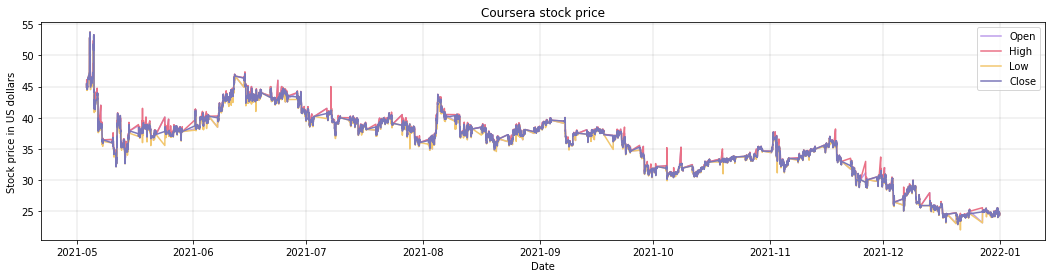

In [4]:
plt.figure(figsize = (18, 4))
plt.title("Coursera stock price")
for price, color in zip(prices, colors):
    plt.plot(dataset.index, dataset[price], color = color)
plt.xlabel("Date")
plt.ylabel("Stock price in US dollars")
plt.legend(prices)
plt.grid(linewidth = 0.1, color = "#000000")
plt.show()

In [5]:
# Create graphs for monthly stock price changes

def monthly_graph(dataset, start_date = "start", end_date = "end"):
    if start_date == "start" and end_date == "end":
        dataset = dataset
    elif start_date == "start":
        dataset = dataset[dataset.index < pd.Timestamp(end_date)]
    elif end_date == "end":
        dataset = dataset[dataset.index > pd.Timestamp(start_date)]
    else:
        dataset = dataset[(dataset.index > pd.Timestamp(start_date)) & (dataset.index < pd.Timestamp(end_date))]
    n_m = len(dataset.groupby([dataset.index.year, dataset.index.month]))
    range_start = 0
    i_m = 0
    fig, axes = plt.subplots(n_m - 1 , 1, figsize = (18, 4 * n_m))
    fig.subplots_adjust(hspace = 0.4)
    for i in range(len(dataset)):
        if i == 0:
            continue
        elif dataset.index.month[i] != dataset.index.month[i-1]:
            for price, color in zip(prices, colors):
                axes[i_m].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_m].set_title(str(dataset.index[i-1].month_name()) + ' ' + str(dataset.index[i-1].year))
            axes[i_m].grid(linewidth = 0.1, color = "#000000")
            axes[i_m].legend(prices)
            axes[i_m].set_xlabel("Date")
            axes[i_m].set_ylabel("Stock price in US dollars")
            range_start = i
            i_m += 1
        elif i == len(dataset) - 1:
            for price, color in zip(prices, colors):
                axes[i_m].plot(dataset.index[range_start : i], dataset[price][range_start : i], color = color)
            axes[i_m].set_title(str(dataset.index[i-1].month_name()) + ' ' + str(dataset.index[i-1].year))
            axes[i_m].grid(linewidth = 0.1, color = "#000000")
            axes[i_m].legend(prices)
            axes[i_m].set_xlabel("Date")
            axes[i_m].set_ylabel("Stock price in US dollars")
    plt.show()

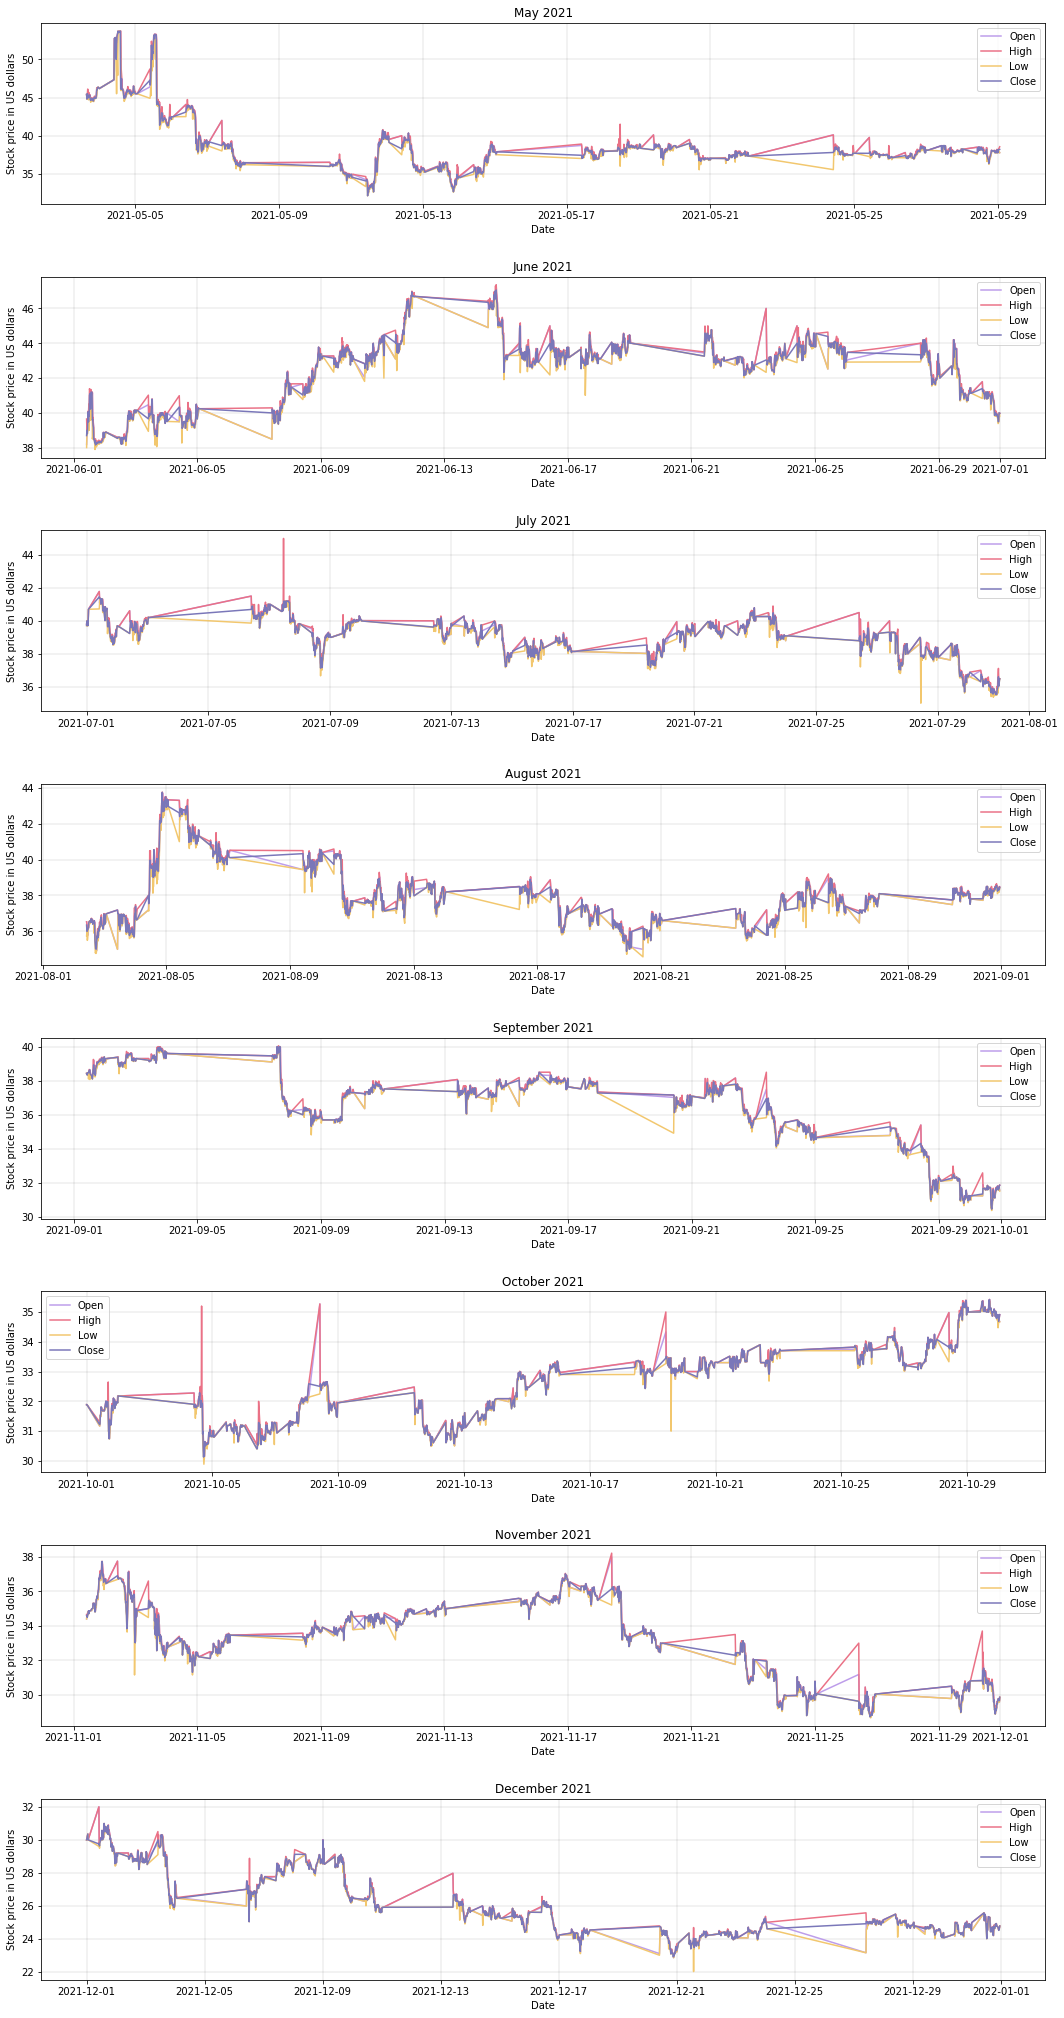

In [6]:
monthly_graph(dataset)

In [13]:
# Create graphs for weekly stock price changes

def weekly_graph(dataset, start_date = "start", end_date = "end"):
    if start_date == "start" and end_date == "end":
        dataset = dataset
    elif start_date == "start":
        dataset = dataset[dataset.index < pd.Timestamp(end_date)]
    elif end_date == "end":
        dataset = dataset[dataset.index > pd.Timestamp(start_date)]
    else:
        dataset = dataset[(dataset.index > pd.Timestamp(start_date)) & (dataset.index < pd.Timestamp(end_date))]
    n_w = len(dataset.groupby([dataset.index.isocalendar().week, dataset.index.year]))
    range_start = 0
    i_w = 0
    fig, axes = plt.subplots(n_w, 1, figsize = (18, 4 * n_w))
    fig.subplots_adjust(hspace=0.4)
    for i in range(len(dataset)):
        if i == 0:
            continue
        elif dataset.index.isocalendar().week[i] != dataset.index.isocalendar().week[i-1]:
            for price, color in zip(prices, colors):
                axes[i_w].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_w].set_title(str(dataset.index[i-1].year) + ' Week #' + str(dataset.index[i-1].isocalendar().week) + 
                                ' (' + str(dataset.index[i-1].month_name()) + ')')
            axes[i_w].grid(linewidth = 0.1, color = "#000000")
            axes[i_w].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            axes[i_w].legend(prices)
            axes[i_w].set_xlabel("Date")
            axes[i_w].set_ylabel("Stock price in US dollars")
            range_start = i
            i_w += 1
        elif i == len(dataset) - 1:
            for price, color in zip(prices, colors):
                axes[i_w].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1], color = color)
            axes[i_w].set_title(str(dataset.index[i-1].year) + ' Week #' + str(dataset.index[i-1].isocalendar().week) + 
                                ' (' + str(dataset.index[i-1].month_name()) + ')')
            axes[i_w].grid(linewidth = 0.1, color = "#000000")
            axes[i_w].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            axes[i_w].legend(prices)
            axes[i_w].set_xlabel("Date")
            axes[i_w].set_ylabel("Stock price in US dollars")
    plt.show()

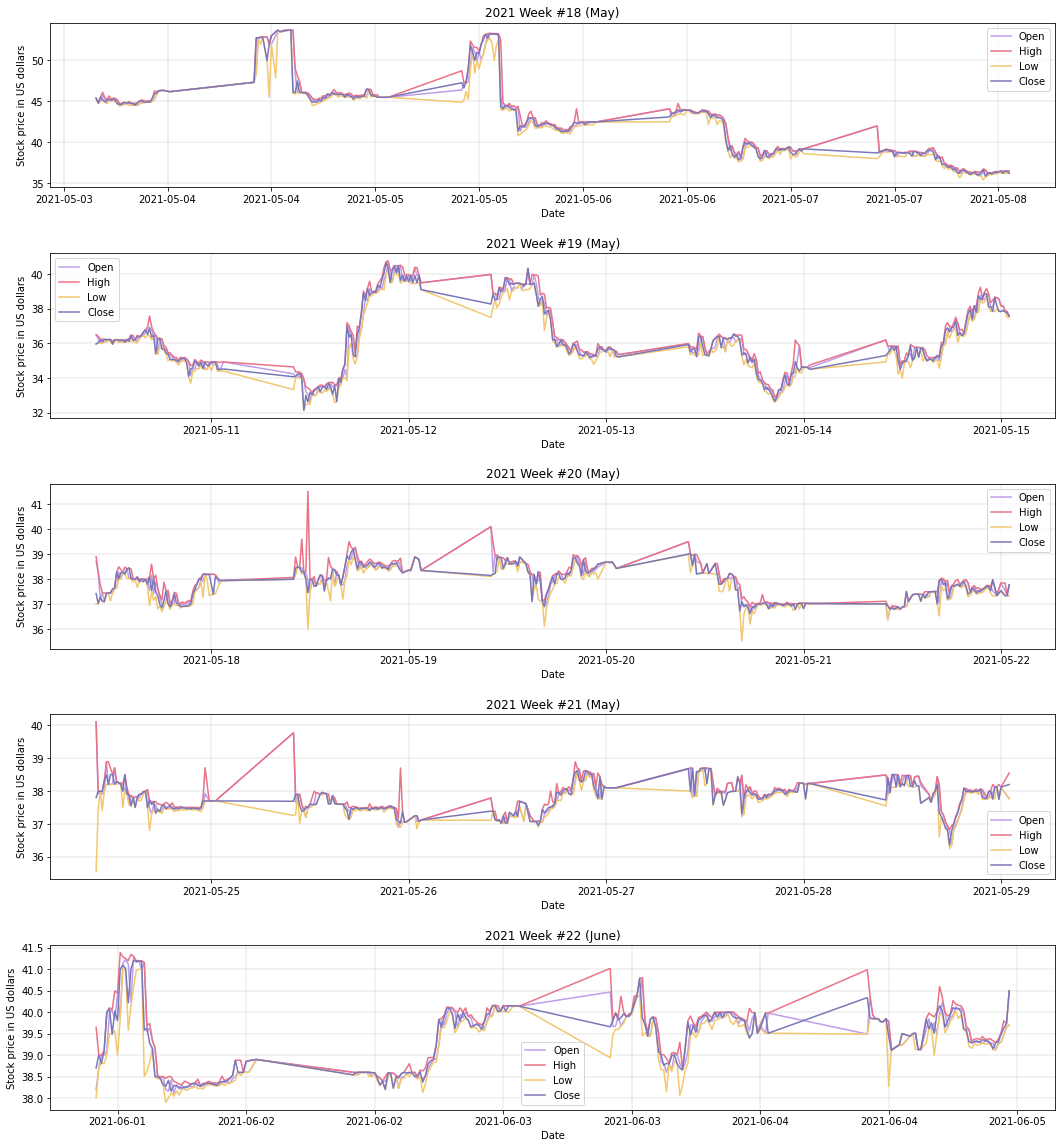

In [14]:
weekly_graph(dataset, start_date = "05/03/2021", end_date = "06/05/2021")

In [18]:
# Define list of holidays in 2021

holidays = ["January 26, 2021",	"March 11, 2021", "March 29, 2021", "April 02, 2021", "April 14, 2021", "April 21, 2021", "May 13, 2021", "July 21, 2021", 
            "August 19, 2021", "September 10, 2021", "October 15, 2021", "November 04, 2021", "November 05, 2021", "November 19, 2021", "December 25, 2021"]
holidays = [pd.Timestamp(x).date for x in holidays]

In [19]:
def daily_graph(dataset, start_date = "start", end_date = "end"):
    if start_date == "start" and end_date == "end":
        dataset = dataset
    elif start_date == "start":
        dataset = dataset[dataset.index < pd.Timestamp(end_date)]
    elif end_date == "end":
        dataset = dataset[dataset.index > pd.Timestamp(start_date)]
    else:
        dataset = dataset[(dataset.index > pd.Timestamp(start_date)) & (dataset.index < pd.Timestamp(end_date))]

    dataset_without_weekends = dataset[(dataset.index.dayofweek != 5) & (dataset.index.dayofweek != 6)]
    for j in range(len(dataset_without_weekends)):
        if dataset_without_weekends.index[j].date in holidays:
            dataset_without_weekends.drop(dataset_without_weekends[j], inplace = True)

    n_d = len(dataset_without_weekends.groupby([dataset_without_weekends.index.day, dataset_without_weekends.index.month,
             dataset_without_weekends.index.year]))

    fig, axes = plt.subplots(n_d, 1, figsize = (18, 4 * n_d))
    fig.subplots_adjust(hspace=0.4)

    d = int(dataset.index[0].day)    # first day of time series
    l = len(dataset)           # number of time steps in time series

    index = 0    # number of iterations
    i = d        # day in month (from 1 to 31)
    ax_n = 0     # graph number

    number_of_values_passed = 0 

    while index < l:
        number_of_values_current = 0
        s_t = index

        
        while (index < l and 
            (int(dataset.index[index].day) == i or 
            (int(dataset.index[index].day) == i + 1 and 
                dataset.index[index].time() < datetime.time(hour = 2, minute = 0, second = 0)))):
            number_of_values_current = number_of_values_current + 1        
            index = index + 1
            e_t = index
            
        number_of_values_next = number_of_values_passed + number_of_values_current
        
        if number_of_values_current != 0 and number_of_values_current >= 2:
            for price, color in zip(prices, colors):
                axes[ax_n].plot(dataset.index[s_t : e_t], dataset[price][number_of_values_passed : number_of_values_next], color = color)
            axes[ax_n].set_title(str(dataset.index[s_t].day) + ' ' + str(dataset.index[s_t].month_name()) +
                            ' ' + str(dataset.index[s_t].year) + ' (' + str(dataset.index[s_t].day_name()) + ')')
            axes[ax_n].grid(linewidth = 0.1, color = "#000000")
            axes[ax_n].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
            axes[ax_n].legend(prices)
            axes[ax_n].set_xlabel("Time")
            axes[ax_n].set_ylabel("Stock price in US dollars")
            ax_n = ax_n + 1

        number_of_values_passed = number_of_values_next
        
        if i == 31:
            i = 0
            
        i = i + 1

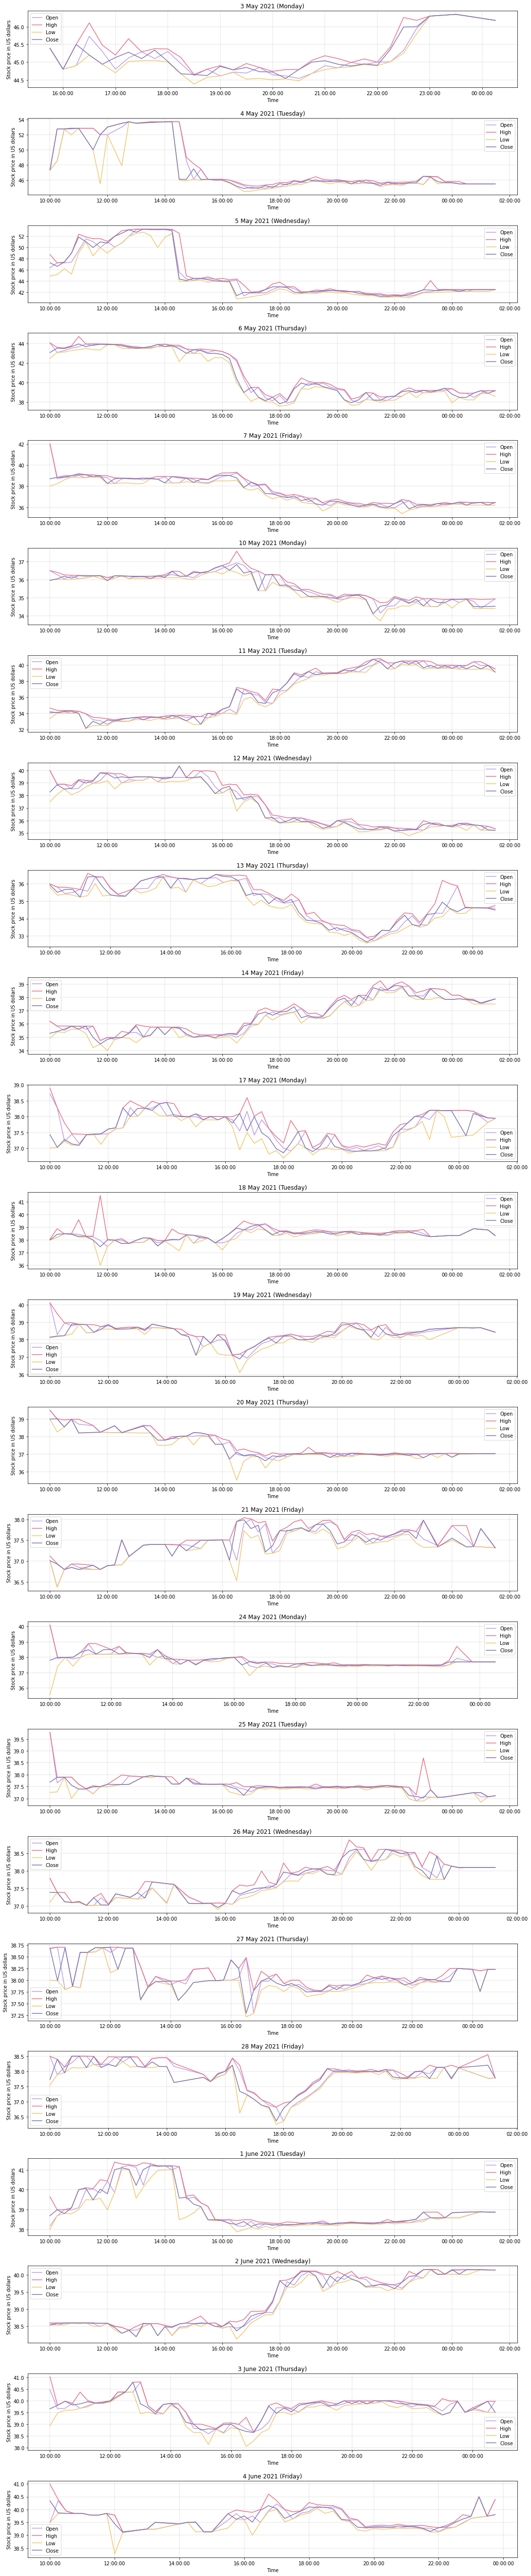

In [20]:
daily_graph(dataset, start_date = "05/03/2021", end_date = "06/05/2021")